# Online Course Recommendation System

#### Recommendation System is a fundamental tool of machine learning designed to providing Personalized suggestions
#### for items that are most relevant to each user.
#### This Recommendation systems are widely used in platforms like Netfix, Amazon, spotify also Social media and so on.
#### There are three main types of Recommendation System
#### 1) Content-based filtering
#### 2) Collaborative filtering
#### 3) Hybrid system

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel(r"C:\Users\abhis\OneDrive\Desktop\Data Science Project\online_course_recommendation_v2.xlsx")
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


## STEP 1: Exploratory Data Analysis(EDA)

In [ ]:
df.shape

(100000, 14)

In [ ]:
df.tail()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
99995,10647,5466,Graphic Design with Canva,Emma Harris,17.3,Yes,Beginner,3.9,49101,485.34,0.838,Yes,16.35,3
99996,13800,2623,Stock Market and Trading Strategies,Dr. John Smith,68.4,Yes,Beginner,3.5,35107,162.80,0.922,Yes,41.94,7
99997,47131,1556,Networking and System Administration,Dr. John Smith,73.8,Yes,Beginner,4.3,12146,24.02,0.990,Yes,15.87,5
99998,49654,6001,Graphic Design with Canva,Daniel White,30.3,Yes,Beginner,3.5,9933,402.24,0.630,Yes,21.05,4
99999,12929,5763,Graphic Design with Canva,Daniel White,67.0,No,Beginner,2.3,3479,135.61,0.753,Yes,8.63,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [ ]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

In [ ]:
df.describe()

,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,5006.863560,52.38354,3.959859,25052.822850,261.073369,0.746865,20.691054,4.992670
std,14406.960108,2882.085456,27.42347,0.729958,14388.188356,139.013758,0.143683,13.669148,2.237259
min,1.000000,1.000000,5.00000,1.000000,50.000000,20.000000,0.092000,1.000000,0.000000
25%,12487.750000,2523.000000,28.60000,3.500000,12583.750000,140.100000,0.649000,9.900000,3.000000
50%,24793.500000,5012.000000,52.40000,4.000000,25057.500000,262.310000,0.750000,19.920000,5.000000
75%,37382.250000,7502.000000,76.10000,4.500000,37522.000000,381.702500,0.851000,30.080000,6.000000
max,49999.000000,9999.000000,100.00000,5.000000,49999.000000,500.000000,1.000000,84.150000,19.000000


In [ ]:
corr = df.corr(numeric_only=True)
corr

,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
user_id,1.000000,0.001386,0.006529,-0.002499,-0.006565,-0.001228,0.000257,-0.004690,0.000682
course_id,0.001386,1.000000,0.005748,-0.000926,0.001915,0.000230,-0.004000,-0.001025,-0.001796
course_duration_hours,0.006529,0.005748,1.000000,0.001650,-0.000591,0.002784,0.001806,-0.001776,-0.002122
rating,-0.002499,-0.000926,0.001650,1.000000,-0.001110,-0.001431,0.001477,0.002027,0.000579
enrollment_numbers,-0.006565,0.001915,-0.000591,-0.001110,1.000000,0.000441,0.001707,0.000402,0.000049
course_price,-0.001228,0.000230,0.002784,-0.001431,0.000441,1.000000,0.004129,-0.002841,0.000842
feedback_score,0.000257,-0.004000,0.001806,0.001477,0.001707,0.004129,1.000000,0.000667,-0.001546
time_spent_hours,-0.004690,-0.001025,-0.001776,0.002027,0.000402,-0.002841,0.000667,1.000000,0.002991
previous_courses_taken,0.000682,-0.001796,-0.002122,0.000579,0.000049,0.000842,-0.001546,0.002991,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken'],
      dtype='object')

In [ ]:
df['course_name'].nunique()

20

In [ ]:
df['course_name'].unique()

array(['Python for Beginners', 'Cybersecurity for Professionals',
       'DevOps and Continuous Deployment',
       'Project Management Fundamentals', 'Ethical Hacking Masterclass',
       'Networking and System Administration',
       'Personal Finance and Wealth Building',
       'Blockchain and Decentralized Applications',
       'Graphic Design with Canva', 'Fitness and Nutrition Coaching',
       'Public Speaking Mastery', 'Photography and Video Editing',
       'Advanced Machine Learning', 'Game Development with Unity',
       'Cloud Computing Essentials', 'Mobile App Development with Swift',
       'Data Visualization with Tableau',
       'Stock Market and Trading Strategies',
       'Fundamentals of Digital Marketing', 'AI for Business Leaders'],
      dtype=object)

In [ ]:
# Visualization

import seaborn as sns
import matplotlib.pyplot as plt

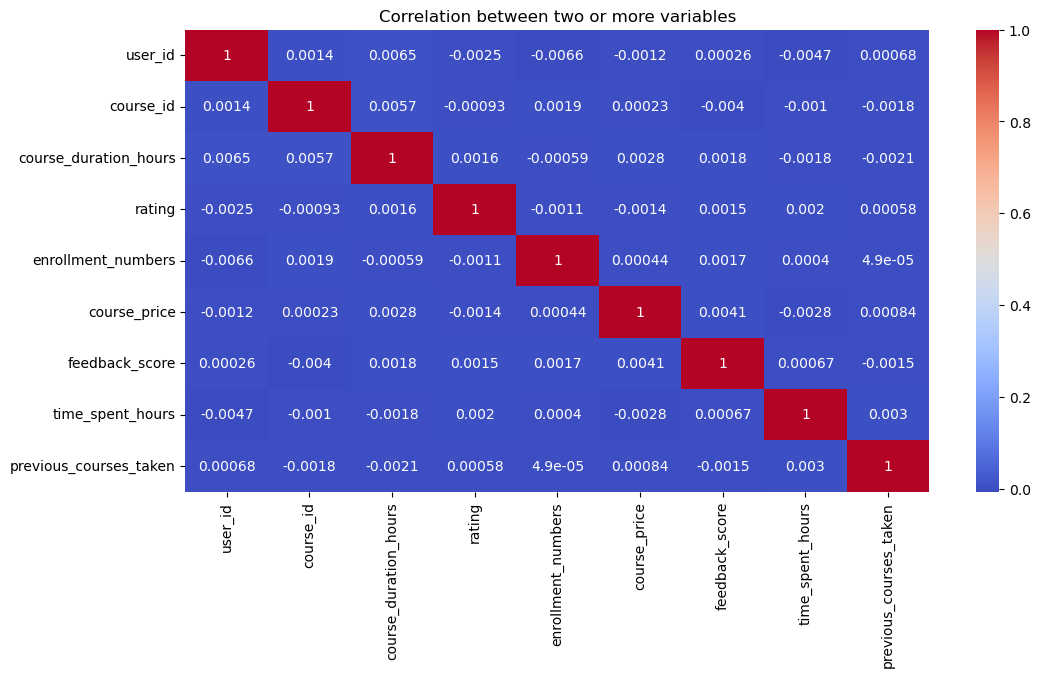

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title('Correlation between two or more variables')
plt.show()

In [ ]:
# Univariate Analysis
df['course_name'].value_counts()

course_name
Networking and System Administration         5107
Cybersecurity for Professionals              5078
Advanced Machine Learning                    5063
Ethical Hacking Masterclass                  5062
Graphic Design with Canva                    5057
DevOps and Continuous Deployment             5037
Public Speaking Mastery                      5028
Mobile App Development with Swift            5024
Stock Market and Trading Strategies          5022
Data Visualization with Tableau              5010
AI for Business Leaders                      5007
Photography and Video Editing                4995
Project Management Fundamentals              4981
Blockchain and Decentralized Applications    4972
Fundamentals of Digital Marketing            4965
Personal Finance and Wealth Building         4933
Python for Beginners                         4931
Cloud Computing Essentials                   4926
Fitness and Nutrition Coaching               4903
Game Development with Unity           

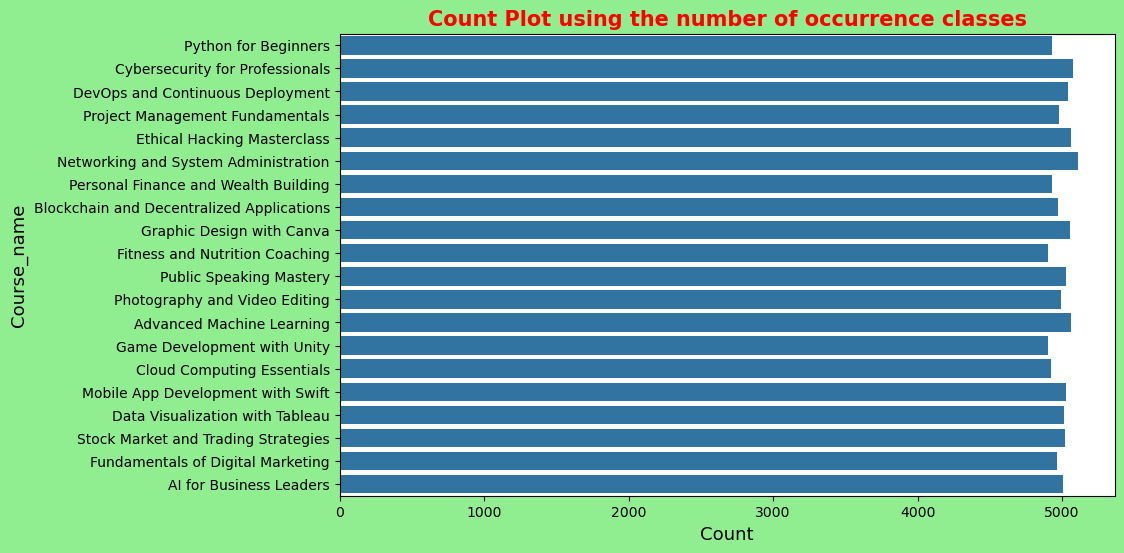

In [ ]:
plt.figure(figsize=(10,6),facecolor='lightgreen')
plt.grid(False)
sns.countplot(df['course_name'])
plt.title('Count Plot using the number of occurrence classes', fontweight='bold',color='red',fontsize = 15)
plt.xlabel("Count",fontsize = 13)
plt.ylabel("Course_name",fontsize = 13)
plt.show()

In [ ]:
df['difficulty_level'].value_counts()

difficulty_level
Beginner        49877
Intermediate    29899
Advanced        20224
Name: count, dtype: int64

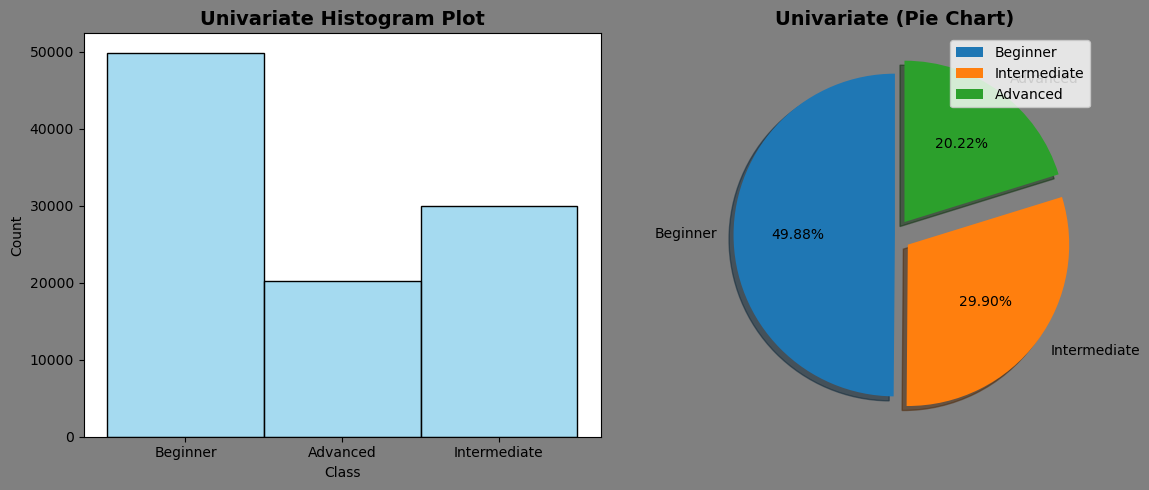

In [ ]:

# Set overall figure size
plt.figure(figsize=(12, 5),facecolor='gray')

# --- Subplot 1: Histogram ---
plt.subplot(1, 2, 1)
sns.histplot(df['difficulty_level'],color='skyblue', edgecolor='black')
plt.title("Univariate Histogram Plot", fontsize=14, fontweight='bold')
plt.xlabel("Class")
plt.ylabel("Count")

# --- Subplot 2: Pie Chart ---
labels = ['Beginner', 'Intermediate','Advanced']
explode = [0, 0.1,0.1]  # Highlight the 'Bankruptcy' slice

plt.subplot(1, 2, 2)
plt.pie(df['difficulty_level'].value_counts(), labels=labels, explode=explode, autopct='%1.2f%%', startangle=90, shadow=True,
        )
#colors=['lightgreen', 'salmon']
plt.title('Univariate (Pie Chart)', fontweight='bold', fontsize=14)
plt.legend(labels, loc='upper right')

# --- Show both plots ---
plt.tight_layout()
plt.show()


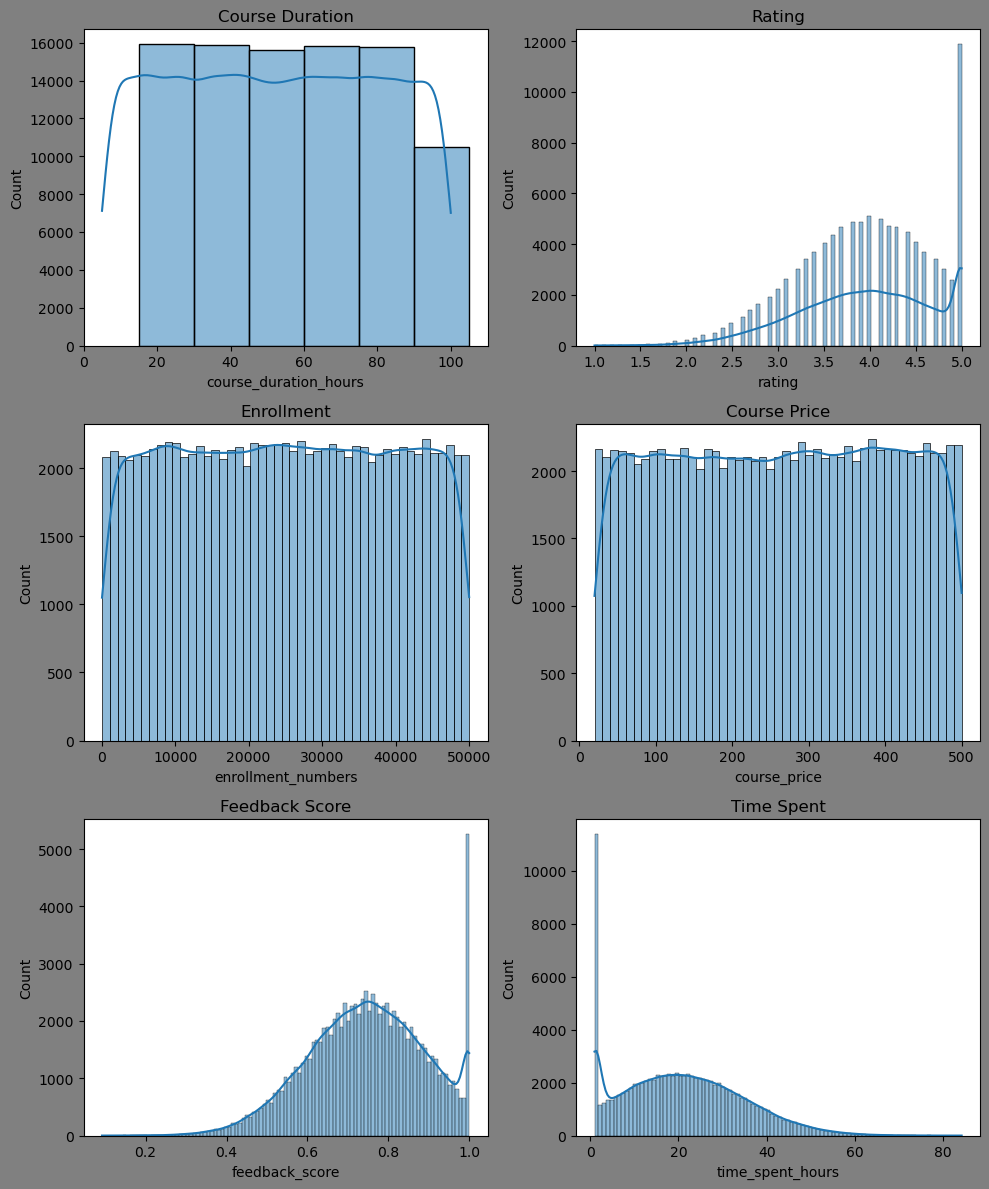

In [ ]:
plt.figure(figsize=(10, 12), facecolor='gray')

plt.subplot(3, 2, 1)
sns.histplot(df['course_duration_hours'],bins = [15,30,45,60,75,90,105], kde=True)
plt.title("Course Duration")

plt.subplot(3, 2, 2)
sns.histplot(df['rating'], kde=True)
plt.title("Rating")

plt.subplot(3, 2, 3)
sns.histplot(df['enrollment_numbers'], kde=True)
plt.title("Enrollment")

plt.subplot(3, 2, 4)
sns.histplot(df['course_price'], kde=True)
plt.title("Course Price")

plt.subplot(3, 2, 5)
sns.histplot(df['feedback_score'], kde=True)
plt.title("Feedback Score")

plt.subplot(3, 2, 6)
sns.histplot(df['time_spent_hours'], kde=True)
plt.title("Time Spent")

plt.tight_layout()
plt.show()


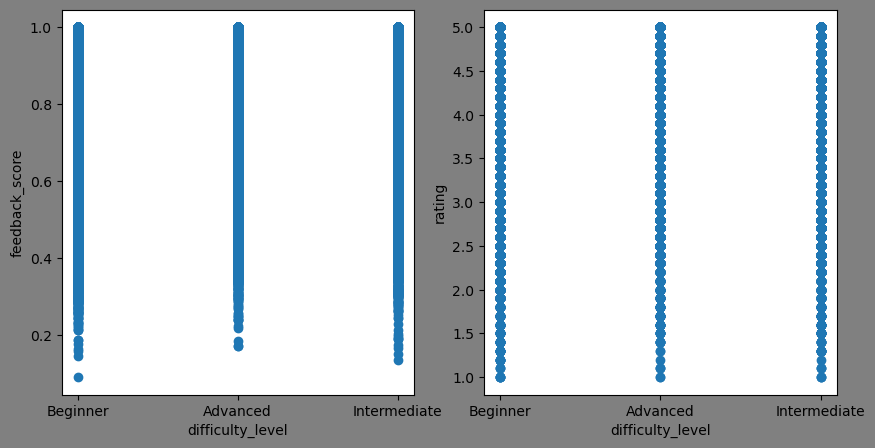

In [ ]:
# Bivariate Analysis

# Set overall figure size
plt.figure(figsize=(10, 5), facecolor='gray')

# --- Subplot 1: Scatter ---
plt.subplot(1, 2, 1)
plt.scatter(df['difficulty_level'],df['feedback_score'])
plt.xlabel('difficulty_level')
plt.ylabel('feedback_score')

plt.subplot(1, 2, 2)
plt.scatter(df['difficulty_level'],df['rating'])
plt.xlabel('difficulty_level')
plt.ylabel('rating')
plt.show()

<Axes: >

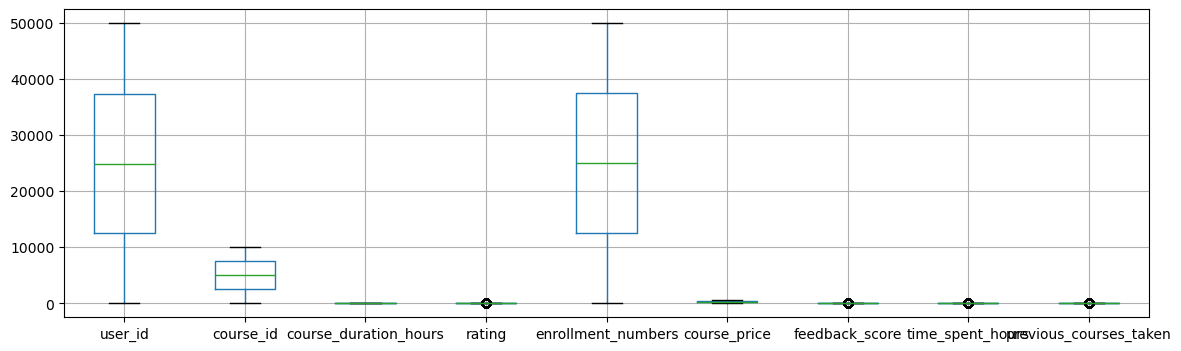

In [ ]:
df.boxplot(figsize=(14,4))
# plt.tight_layout()

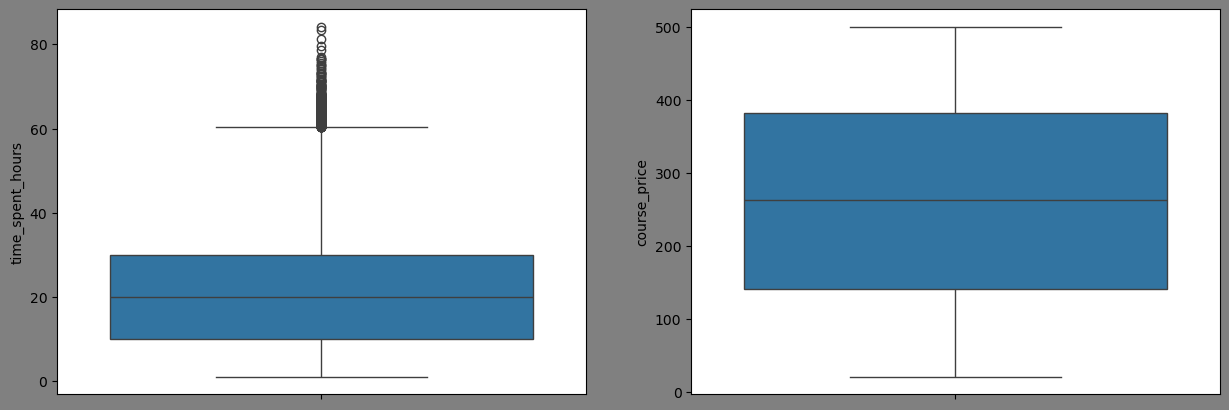

In [ ]:
plt.figure(figsize=(15, 5), facecolor='gray')

plt.subplot(1, 2, 1)
sns.boxplot(df['time_spent_hours'])

plt.subplot(1, 2, 2)
sns.boxplot(df['course_price'])
plt.show()

In [ ]:
## Handling Outliers

<BarContainer object of 30 artists>

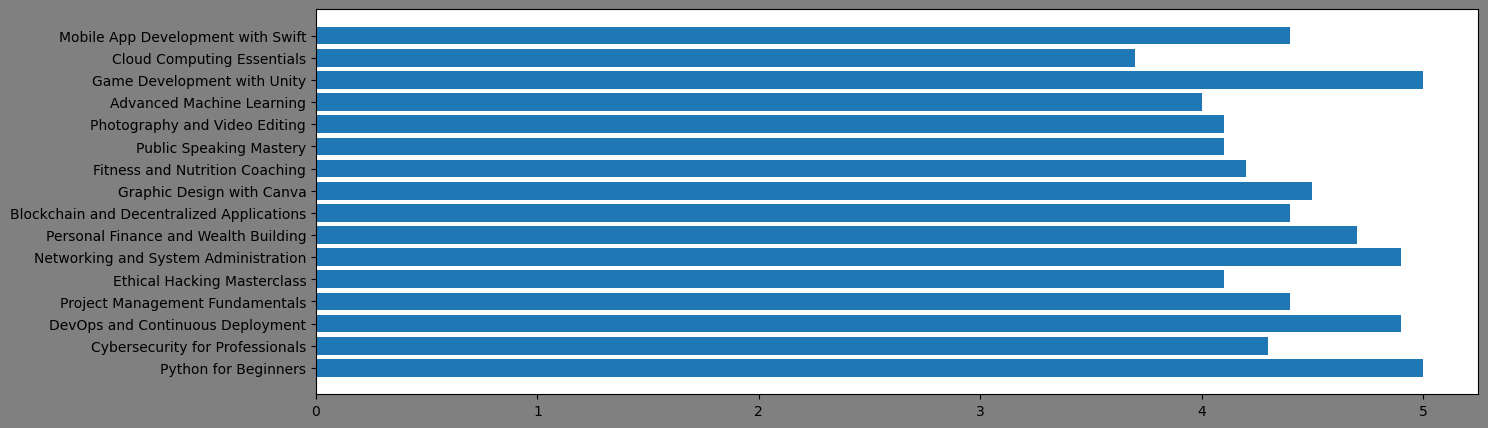

In [ ]:
# Bivariate Analysis
# Set overall figure size
plt.figure(figsize=(15, 5), facecolor='gray')

# --- Subplot 1: Line plot ---
# plt.subplot(1, 2, 1)
plt.barh(df['course_name'].head(30),df['rating'].head(30))

# plt.subplot(1, 2, 2)
# plt.plot(df['course_name'].head(10),df['course_price'].head(10))
# plt.show()

In [ ]:
# Pair chart

# sns.pairplot(df)

### Bag-of-Words (BoW) simply counts how many times each word appears in a document,
### while TF-IDF adjusts this count by down-weighting common words that appear in many documents and up-weighting rare but more informative words.
### In short, BoW treats all words equally based on frequency,
### while TF-IDF gives more importance to words that are unique to a specific document.

In [ ]:
# #Data cleaning and preprocessing
# import re
# import nltk
# nltk.download('stopwords')

# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# corpus = []
# for i in range(0, len(messages)):
#     review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
#     review = review.lower()
#     review = review.split()

#     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

In [ ]:
df['instructor'].nunique()

20

In [ ]:
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


In [ ]:
df1 = df.groupby(['course_name','instructor','certification_offered','difficulty_level','study_material_available'])['rating'].mean().reset_index()
df1

,course_name,instructor,certification_offered,difficulty_level,study_material_available,rating
0,AI for Business Leaders,Alexander Young,No,Advanced,No,2.400000
1,AI for Business Leaders,Alexander Young,No,Advanced,Yes,4.088889
2,AI for Business Leaders,Alexander Young,No,Beginner,No,3.937500
3,AI for Business Leaders,Alexander Young,No,Beginner,Yes,4.026316
4,AI for Business Leaders,Alexander Young,No,Intermediate,No,4.766667
...,...,...,...,...,...,...
4717,Stock Market and Trading Strategies,William Thomas,Yes,Advanced,Yes,4.036364
4718,Stock Market and Trading Strategies,William Thomas,Yes,Beginner,No,4.120000
4719,Stock Market and Trading Strategies,William Thomas,Yes,Beginner,Yes,4.058621
4720,Stock Market and Trading Strategies,William Thomas,Yes,Intermediate,No,4.057143


In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1['course_name'].value_counts()

course_name
AI for Business Leaders                      238
Fitness and Nutrition Coaching               238
Ethical Hacking Masterclass                  238
Cybersecurity for Professionals              238
Project Management Fundamentals              238
DevOps and Continuous Deployment             237
Advanced Machine Learning                    237
Blockchain and Decentralized Applications    237
Public Speaking Mastery                      237
Graphic Design with Canva                    237
Data Visualization with Tableau              237
Cloud Computing Essentials                   236
Mobile App Development with Swift            236
Photography and Video Editing                236
Networking and System Administration         235
Game Development with Unity                  235
Stock Market and Trading Strategies          234
Python for Beginners                         234
Personal Finance and Wealth Building         233
Fundamentals of Digital Marketing            231
Name: co

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['course_name'])
# cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(df1['course_name'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [ ]:
# Course_name = 'Advanced Machine Learning'
# item_index = df1[df1['course_name']==Course_name].index[0]

In [ ]:
Course_name = 'Cybersecurity for Professionals'
item_index = df1[df1['course_name']==Course_name].index[0]

In [ ]:
item_index

np.int64(948)

In [ ]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [ ]:
similar_items

[(0, np.float64(0.0)),
 (1, np.float64(0.0)),
 (2, np.float64(0.0)),
 (3, np.float64(0.0)),
 (4, np.float64(0.0)),
 (5, np.float64(0.0)),
 (6, np.float64(0.0)),
 (7, np.float64(0.0)),
 (8, np.float64(0.0)),
 (9, np.float64(0.0)),
 (10, np.float64(0.0)),
 (11, np.float64(0.0)),
 (12, np.float64(0.0)),
 (13, np.float64(0.0)),
 (14, np.float64(0.0)),
 (15, np.float64(0.0)),
 (16, np.float64(0.0)),
 (17, np.float64(0.0)),
 (18, np.float64(0.0)),
 (19, np.float64(0.0)),
 (20, np.float64(0.0)),
 (21, np.float64(0.0)),
 (22, np.float64(0.0)),
 (23, np.float64(0.0)),
 (24, np.float64(0.0)),
 (25, np.float64(0.0)),
 (26, np.float64(0.0)),
 (27, np.float64(0.0)),
 (28, np.float64(0.0)),
 (29, np.float64(0.0)),
 (30, np.float64(0.0)),
 (31, np.float64(0.0)),
 (32, np.float64(0.0)),
 (33, np.float64(0.0)),
 (34, np.float64(0.0)),
 (35, np.float64(0.0)),
 (36, np.float64(0.0)),
 (37, np.float64(0.0)),
 (38, np.float64(0.0)),
 (39, np.float64(0.0)),
 (40, np.float64(0.0)),
 (41, np.float64(0.0)),
 (

In [ ]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]
top_similar_items

[(949, np.float64(1.0000000000000002)),
 (950, np.float64(1.0000000000000002)),
 (951, np.float64(1.0000000000000002)),
 (952, np.float64(1.0000000000000002)),
 (953, np.float64(1.0000000000000002)),
 (954, np.float64(1.0000000000000002)),
 (955, np.float64(1.0000000000000002)),
 (956, np.float64(1.0000000000000002)),
 (957, np.float64(1.0000000000000002))]

In [ ]:
recommended_items_indics = [x[0] for x in top_similar_items]
recommended_items_indics

[949, 950, 951, 952, 953, 954, 955, 956, 957]

In [ ]:
df1.iloc[recommended_items_indics][['course_name','instructor','certification_offered','difficulty_level','study_material_available','rating']]

,course_name,instructor,certification_offered,difficulty_level,study_material_available,rating
949,Cybersecurity for Professionals,Alexander Young,No,Beginner,No,3.800000
950,Cybersecurity for Professionals,Alexander Young,No,Beginner,Yes,3.918182
951,Cybersecurity for Professionals,Alexander Young,No,Intermediate,No,3.400000
952,Cybersecurity for Professionals,Alexander Young,No,Intermediate,Yes,3.831250
953,Cybersecurity for Professionals,Alexander Young,Yes,Advanced,No,3.854545
954,Cybersecurity for Professionals,Alexander Young,Yes,Advanced,Yes,4.029630
955,Cybersecurity for Professionals,Alexander Young,Yes,Beginner,No,3.761538
956,Cybersecurity for Professionals,Alexander Young,Yes,Beginner,Yes,3.785057
957,Cybersecurity for Professionals,Alexander Young,Yes,Intermediate,No,3.978571


# Function To Recommend Products for Content Base

In [ ]:
df2 = df.groupby(['user_id','course_name','instructor','certification_offered','difficulty_level','study_material_available'])['rating'].mean().reset_index()
df2.head()

,user_id,course_name,instructor,certification_offered,difficulty_level,study_material_available,rating
0,1,Photography and Video Editing,Dr. Mia Walker,Yes,Beginner,Yes,3.9
1,2,Advanced Machine Learning,Prof. Emily Johnson,Yes,Beginner,Yes,3.3
2,2,Blockchain and Decentralized Applications,Dr. Robert Davis,No,Advanced,Yes,4.5
3,2,Cybersecurity for Professionals,Sarah Lee,Yes,Beginner,Yes,3.6
4,2,Data Visualization with Tableau,Alexander Young,Yes,Beginner,Yes,4.5


In [ ]:
df2 = df2.sample(10000)

In [ ]:
df2 = df2.reset_index()
df2.head()

,index,user_id,course_name,instructor,certification_offered,difficulty_level,study_material_available,rating
0,25051,12522,Photography and Video Editing,Dr. Robert Davis,Yes,Advanced,Yes,5.0
1,17276,8676,Project Management Fundamentals,David Wilson,Yes,Intermediate,Yes,4.7
2,62927,31264,AI for Business Leaders,Benjamin Lewis,Yes,Beginner,Yes,3.2
3,44741,22253,Cloud Computing Essentials,Dr. Robert Davis,Yes,Intermediate,Yes,3.0
4,70719,35215,Python for Beginners,Isabella Scott,Yes,Advanced,Yes,3.3


In [ ]:
df2 = df2.drop(columns=['index'])

In [ ]:
df2.head()

,user_id,course_name,instructor,certification_offered,difficulty_level,study_material_available,rating
0,12522,Photography and Video Editing,Dr. Robert Davis,Yes,Advanced,Yes,5.0
1,8676,Project Management Fundamentals,David Wilson,Yes,Intermediate,Yes,4.7
2,31264,AI for Business Leaders,Benjamin Lewis,Yes,Beginner,Yes,3.2
3,22253,Cloud Computing Essentials,Dr. Robert Davis,Yes,Intermediate,Yes,3.0
4,35215,Python for Beginners,Isabella Scott,Yes,Advanced,Yes,3.3


In [ ]:

len(df2)

10000

In [ ]:
import pandas as pd

# Save to Excel
# df2 = df2.to_excel(r"C:\Users\abhis\OneDrive\Desktop\Data Science Project\scores.xlsx", index=False)
df2 = pd.read_excel(r"C:\Users\abhis\OneDrive\Desktop\Data Science Project\Online_Course_Recommendation_Dataset_scores.xlsx")
df2.head()

,user_id,course_name,instructor,certification_offered,difficulty_level,study_material_available,rating
0,12522,Photography and Video Editing,Dr. Robert Davis,Yes,Advanced,Yes,5.0
1,8676,Project Management Fundamentals,David Wilson,Yes,Intermediate,Yes,4.7
2,31264,AI for Business Leaders,Benjamin Lewis,Yes,Beginner,Yes,3.2
3,22253,Cloud Computing Essentials,Dr. Robert Davis,Yes,Intermediate,Yes,3.0
4,35215,Python for Beginners,Isabella Scott,Yes,Advanced,Yes,3.3


In [ ]:
df2['course_name'].nunique()

20

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(df2, course_name, top_n=10):
    # Check if the item exists
    if course_name not in df2['course_name'].values:
        print(f"Course '{course_name}' not found in the dataset.")
        return pd.DataFrame()

    # TF-IDF Vectorizer (using course_name text)
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(df2['course_name'])

    # Cosine similarity matrix
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Index of the selected course
    item_index = df2[df2['course_name'] == course_name].index[0]

    # Similarity scores for that course
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort by similarity (highest → lowest)
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Exclude the selected course itself
    top_similar_items = similar_items[1:top_n + 1]

    # Extract row indices
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Return course details
    recommended_items_details = df2.iloc[recommended_item_indices][[
        'course_name',
        'instructor',
        'certification_offered',
        'difficulty_level',
        'study_material_available'
    ]]

    return recommended_items_details

# # Example: Get content-based recommendations for a specific item
# course_name = 'Python for Beginners'
# content_based_rec = content_based_recommendations(df2, course_name, top_n=10)
# content_based_rec

In [ ]:
# Example: Get content-based recommendations for a specific item
course_name = 'Python for Beginners'
content_based_rec = content_based_recommendations(df2, course_name, top_n=10)
content_based_rec

,course_name,instructor,certification_offered,difficulty_level,study_material_available
38,Python for Beginners,Charlotte King,No,Intermediate,No
71,Python for Beginners,Sarah Lee,No,Advanced,Yes
84,Python for Beginners,Sarah Lee,Yes,Beginner,Yes
107,Python for Beginners,Benjamin Lewis,Yes,Beginner,No
144,Python for Beginners,Isabella Scott,No,Beginner,Yes
174,Python for Beginners,Charlotte King,Yes,Advanced,Yes
180,Python for Beginners,Liam Adams,Yes,Advanced,Yes
261,Python for Beginners,David Wilson,No,Beginner,Yes
272,Python for Beginners,Dr. Mia Walker,Yes,Intermediate,No
300,Python for Beginners,David Wilson,Yes,Intermediate,No


# Deploy a model

In [ ]:
%%writefile content_recommend.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ----------------------------------------------------------
# SIDEBAR THEME SWITCHER
# ----------------------------------------------------------
st.sidebar.header("🎨 Theme Customization")

theme_choice = st.sidebar.selectbox(
    "Choose Background Theme",
    ["Light Blue", "Dark Mode", "Gradient Purple", "Mint Green"]
)

# ----------------------------------------------------------
# DYNAMIC BACKGROUND CSS
# ----------------------------------------------------------
if theme_choice == "Light Blue":
    page_bg = """
    <style>
        .stApp { background-color: #e7f3ff !important; }
        body { background-color: #e7f3ff !important; }
        .css-1d391kg { background-color: #d9ecff !important; }
    </style>
    """

elif theme_choice == "Dark Mode":
    page_bg = """
    <style>
        .stApp { background-color: #1e1e1e !important; color: white !important; }
        body { background-color: #1e1e1e !important; color: white !important; }
        .css-1d391kg { background-color: #111 !important; }
        h1, h2, h3, h4, h5, h6, p, label, .stMetric { color: white !important; }
    </style>
    """

elif theme_choice == "Gradient Purple":
    page_bg = """
    <style>
        .stApp {
            background: linear-gradient(to bottom right, #8e2de2, #4a00e0) !important;
            color: white !important;
        }
        body {
            background: linear-gradient(to bottom right, #8e2de2, #4a00e0) !important;
        }
        .css-1d391kg { background-color: #3d009b !important; }
        h1, h2, h3, h4, h5, h6, p, label { color: white !important; }
    </style>
    """

elif theme_choice == "Mint Green":
    page_bg = """
    <style>
        .stApp { background-color: #d7fff1 !important; }
        body { background-color: #d7fff1 !important; }
        .css-1d391kg { background-color: #b8f7e6 !important; }
    </style>
    """

st.markdown(page_bg, unsafe_allow_html=True)

# ----------------------------------------------------------
# RECOMMENDATION FUNCTION (WITH SCORES)
# ----------------------------------------------------------
def content_based_recommendations(df2, course_name, top_n=10):
    if course_name not in df2['course_name'].values:
        return pd.DataFrame(), []

    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df2['course_name'])

    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    item_index = df2[df2['course_name'] == course_name].index[0]

    similar_items = sorted(
        list(enumerate(cosine_sim[item_index])),
        key=lambda x: x[1],
        reverse=True
    )

    top_similar = similar_items[1:top_n + 1]
    indices = [x[0] for x in top_similar]
    scores = [x[1] for x in top_similar]

    result = df2.iloc[indices][[
        'course_name',
        'instructor',
        'certification_offered',
        'difficulty_level',
        'study_material_available'
    ]]

    return result, scores

# ----------------------------------------------------------
# MAIN UI
# ----------------------------------------------------------
st.title("📘 Course Recommendation System")
st.markdown("### Find similar courses using TF-IDF + Cosine Similarity + Evaluation Metrics")

uploaded_file = st.file_uploader("Upload your dataset", type=["csv", "xlsx", "xls"])

if uploaded_file:

    ext = uploaded_file.name.split(".")[-1]
    df2 = pd.read_csv(uploaded_file) if ext == "csv" else pd.read_excel(uploaded_file)

    st.success("File loaded successfully!")

    if st.checkbox("Show Dataset Preview"):
        st.dataframe(df2.head())

    course_name = st.selectbox("Select a Course", df2['course_name'].unique().tolist())

    top_n = st.slider("Number of Recommendations", 3, 20, 10)

    if st.button("Get Recommendations"):
        results, scores = content_based_recommendations(df2, course_name, top_n)

        if results.empty:
            st.warning("Course not found.")
        else:
            st.subheader("Recommended Courses")
            st.table(results)

            # ----------------------------------------------------------
            # EVALUATION METRICS SECTION
            # ----------------------------------------------------------
            st.subheader("📊 Evaluation Metrics")

            scores_np = np.array(scores)

            col1, col2, col3 = st.columns(3)

            col1.metric("Average Similarity", round(scores_np.mean(), 4))
            col2.metric("Highest Similarity", round(scores_np.max(), 4))
            col3.metric("Lowest Similarity", round(scores_np.min(), 4))

            st.write("### Similarity Score Table")
            score_df = pd.DataFrame({
                "Course": results['course_name'],
                "Similarity Score": scores
            })
            st.table(score_df)

            st.write("### 📈 Similarity Score Trend")
            st.line_chart(scores_np)

else:
    st.info("Please upload a dataset.")


Writing content_recommend.py


In [ ]:
!streamlit run content_recommend.py

In [ ]:
# course_name = 'Cloud Computing Essentials'
# content_based_rec = content_based_recommendations(df2, course_name, top_n=8)

# content_based_rec

# Collaborative Filtering (User Item Similarity)

In [ ]:
df2['user_id'].nunique()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def collaborative_filtering_recommendations(df2, user_id, top_n=10):

    # Validate user
    if target_user_id not in df2['user_id'].unique():
        print(f"User {user_id} not found in dataset.")
        return pd.DataFrame()

    # Create user–item matrix
    user_item_matrix = df2.pivot_table(
        index='user_id',
        columns='course_name',
        values='rating',
        aggfunc='mean'
    ).fillna(0)

    # Cosine similarity between users
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(user_similarity,
                                      index=user_item_matrix.index,
                                      columns=user_item_matrix.index)

    # Find target user similarity scores
    similar_users = user_similarity_df.loc[target_user_id].sort_values(ascending=False)[1:]

    # Recommendations storage
    recommended_items = []

    # Target user ratings
    target_user_ratings = user_item_matrix.loc[target_user_id]

    # Loop over similar users
    for similar_user_id, sim_score in similar_users.items():
        similar_user_ratings = user_item_matrix.loc[similar_user_id]

        # Courses similar user rated but target user has not
        not_rated_yet = (target_user_ratings == 0) & (similar_user_ratings > 0)

        candidate_courses = similar_user_ratings.index[not_rated_yet]

        recommended_items.extend(candidate_courses)

        # Stop when enough items collected
        if len(recommended_items) >= top_n:
            break

    # Remove duplicates while keeping order
    recommended_items = list(dict.fromkeys(recommended_items))

    # Keep only top_n
    recommended_items = recommended_items[:top_n]

    # Fetch course details
    recommended_items_details = df2[
        df2['course_name'].isin(recommended_items)
    ][[
        'user_id',
        'course_name',
        'instructor',
        'certification_offered',
        'difficulty_level',
        'study_material_available'
    ]].drop_duplicates()

    return recommended_items_details.head(top_n)


In [ ]:
# df[df['user_id'] == 2]

In [ ]:
target_user_id = 2
top_n = 10

collab_recs = collaborative_filtering_recommendations(df2, target_user_id, top_n)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collab_recs


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.neighbors import NearestNeighbors

# def user_based_knn_recommend(df2, user_id, top_n=10, k=5):

#     # 1. Check if user exists
#     if user_id not in df2['user_id'].unique():
#         print(f"User {user_id} not found in dataset.")
#         return pd.DataFrame()

#     # 2. User–Item Rating Matrix
#     user_item_matrix = df2.pivot_table(
#         index='user_id',
#         columns='course_name',
#         values='rating',
#         aggfunc='mean'
#     ).fillna(0)

#     # Convert to matrix
#     matrix = user_item_matrix.values

#     # 3. Train KNN (Cosine Similarity)
#     knn = NearestNeighbors(metric='cosine', algorithm='brute')
#     knn.fit(matrix)

#     # Index of the target user
#     user_index = user_item_matrix.index.tolist().index(user_id)

#     # 4. Find k nearest neighbors
#     distances, indices = knn.kneighbors(
#         matrix[user_index].reshape(1, -1),
#         n_neighbors=k + 1   # includes itself
#     )

#     # Remove itself
#     neighbor_indices = indices.flatten()[1:]
#     similar_users = user_item_matrix.index[neighbor_indices]

#     # 5. Score Calculation (Weighted Ratings)
#     user_ratings = user_item_matrix.loc[user_id]
#     weighted_scores = {}

#     for idx, neighbor_user in enumerate(similar_users):
#         similarity = 1 - distances.flatten()[idx + 1]  # convert distance → similarity
#         neighbor_ratings = user_item_matrix.loc[neighbor_user]

#         for course, rating in neighbor_ratings.items():
#             if user_ratings[course] == 0 and rating > 0:  # recommend only unseen items
#                 weighted_scores[course] = weighted_scores.get(course, 0) + (rating * similarity)

#     # Sort recommendations
#     recommended_courses = sorted(weighted_scores, key=weighted_scores.get, reverse=True)[:top_n]

#     # 6. Fetch Final Course Details
#     final_recommendations = df2[
#         df2['course_name'].isin(recommended_courses)
#     ][[
#         'course_name',
#         'instructor',
#         'difficulty_level',
#         'certification_offered',
#         'study_material_available'
#     ]].drop_duplicates()

#     return final_recommendations.head(top_n)


In [ ]:
# user_id = 100
# recommendations = user_based_knn_recommend(df2, user_id, top_n=10, k=5)
# recommendations


# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)

In [ ]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(df2,target_user_id, course_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(df2,course_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(df2,target_user_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()

    return hybrid_rec.head(10)

In [ ]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
course_name = "Advanced Machine Learning"  # Change this to the item name
hybrid_rec = hybrid_recommendations(df2,target_user_id, course_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{course_name}':")
hybrid_rec

In [ ]:
# Evaluation matrix

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# ================================
# 1. TF-IDF MODEL CREATION
# ================================
def build_tfidf(df):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['course_name'])
    cosine_sim = cosine_similarity(tfidf_matrix)

    return vectorizer, tfidf_matrix, cosine_sim


# ================================
# 2. GET TOP-N RECOMMENDATIONS
# ================================
def get_recommendations(course_name, df, cosine_sim, top_n=10):
    if course_name not in df['course_name'].values:
        print("Course not found.")
        return []

    idx = df[df['course_name'] == course_name].index[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_items = sim_scores[1:top_n + 1]   # exclude itself

    return top_items  # List of (index, similarity)


# ====================================================
# 3. SIMILARITY EVALUATION METRICS (Content-Based)
# ====================================================

def average_similarity(top_items):
    return np.mean([sim for _, sim in top_items])


def diversity_score(top_items, cosine_sim):
    # Lower cosine similarity between recommended items = higher diversity
    sims = []
    indices = [i for i, _ in top_items]

    for i in range(len(indices)):
        for j in range(i + 1, len(indices)):
            sims.append(cosine_sim[indices[i], indices[j]])

    if len(sims) == 0:
        return 0

    return 1 - np.mean(sims)     # 1 - similarity = diversity


def coverage(df, cosine_sim, threshold=0.20):
    count = 0
    for i in range(len(df)):
        if np.max(cosine_sim[i]) > threshold:
            count += 1
    return count / len(df)


# ====================================================
# 4. RANKING METRICS (Precision, Recall, NDCG...)
# ====================================================

def precision_at_k(recommended_indices, relevant_indices, k):
    recommended_top_k = recommended_indices[:k]
    relevant_retrieved = len(set(recommended_top_k) & set(relevant_indices))
    return relevant_retrieved / k


def recall_at_k(recommended_indices, relevant_indices, k):
    relevant_retrieved = len(set(recommended_indices[:k]) & set(relevant_indices))
    return relevant_retrieved / len(relevant_indices)


def f1_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)


def dcg(scores):
    return np.sum([score / np.log2(i + 2) for i, score in enumerate(scores)])


def ndcg_at_k(recommended_indices, relevant_indices, k):
    scores = [1 if idx in relevant_indices else 0 for idx in recommended_indices[:k]]
    ideal = sorted(scores, reverse=True)
    return dcg(scores) / (dcg(ideal) + 1e-10)


# ====================================================
# 5. ERROR METRICS (When Ratings Exist)
# ====================================================

def mae(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))


def rmse(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred)) ** 2))


# ====================================================
# 6. FULL EVALUATION PIPELINE
# ====================================================
def evaluate_all_metrics(df, course_name, relevant_indices, top_n=10):
    vectorizer, tfidf_matrix, cosine_sim = build_tfidf(df)
    top_items = get_recommendations(course_name, df, cosine_sim, top_n)

    # Extract recommended item indexes
    recommended_indices = [idx for idx, _ in top_items]

    # --- Content-Based Metrics ---
    avg_sim = average_similarity(top_items)
    div_score = diversity_score(top_items, cosine_sim)
    cov_score = coverage(df, cosine_sim)

    # --- Ranking Metrics ---
    precision = precision_at_k(recommended_indices, relevant_indices, top_n)
    recall = recall_at_k(recommended_indices, relevant_indices, top_n)
    f1 = f1_at_k(precision, recall)
    ndcg = ndcg_at_k(recommended_indices, relevant_indices, top_n)

    return {
        "Average Similarity": avg_sim,
        "Diversity Score": div_score,
        "Coverage": cov_score,
        "Precision@K": precision,
        "Recall@K": recall,
        "F1@K": f1,
        "nDCG@K": ndcg
    }


In [ ]:
course_name = "Python for Beginners"

# Example: relevant courses (you must define this list)
relevant_indices = [12, 45, 78]   # assume these items are relevant

results = evaluate_all_metrics(df2, course_name, relevant_indices, top_n=10)

print(results)
